In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [53]:
# Reading data into notebook
store_raw = pd.read_csv('BUSY.csv', usecols=[0])

In [54]:
matplotlib.style.use('ggplot')
store_raw.head(10)

,POS_Application_Name|STOREID|MACID|BILLNO|BARCODE|GUID|CREATED_STAMP|CAPTURED_WINDOW|UPDATE_STAMP
0,BUSY|DEL0000001446|counter1|counter1DEL0000001...
1,BUSY|DEL0000001446|counter1|counter1DEL0000001...
2,BUSY|DEL0000001446|counter1|counter1DEL0000001...
3,BUSY|DEL0000001446|counter1|counter1DEL0000001...
4,BUSY|DEL0000001446|counter1|counter1DEL0000001...
5,BUSY|DEL0000001446|counter1|counter1DEL0000001...
6,BUSY|DEL0000001446|counter1|counter1DEL0000001...
7,BUSY|DEL0000001446|counter1|counter1DEL0000001...
8,BUSY|DEL0000001446|counter1|counter1DEL0000001...
9,BUSY|DEL0000001446|counter1|counter1DEL0000001...


## Data Wrangling Phase



In [55]:
# foo = lambda x: pd.Series([i for i in reversed(x.split('|'))])
# rev = store_raw['POS_Application_Name, STOREID, MACID, BILLNO, BARCODE, GUID, CREATED_STAMP, CAPTURED_WINDOW, UPDATE_STAMP'].apply(foo)
# rev
initial = 'POS_Application_Name|STOREID|MACID|BILLNO|BARCODE|GUID|CREATED_STAMP|CAPTURED_WINDOW|UPDATE_STAMP'
store_raw = store_raw[initial].str.split('|', expand=True)

In [56]:
store = store_raw.drop([9,10,11,12,13,14,15,16], axis=1)

In [57]:
store.count()

0    462463
1    462463
2    462463
3    462463
4    462463
5    462463
6    462463
7    462463
8    462381
dtype: int64

In [58]:
store.dropna(inplace=True)
store.count()

0    462381
1    462381
2    462381
3    462381
4    462381
5    462381
6    462381
7    462381
8    462381
dtype: int64

In [59]:
store.columns = ['POS_Application_Name', 'STOREID','MACID','BILLNO','BARCODE','GUID','CREATED_STAMP','CAPTURED_WINDOW','UPDATE_STAMP']

## Exploration Phase

In this phase we will explore our data in more detail and extract out the analysis and prove them with the help of visualizations.

In [60]:
store.head(10)

,POS_Application_Name,STOREID,MACID,BILLNO,BARCODE,GUID,CREATED_STAMP,CAPTURED_WINDOW,UPDATE_STAMP
0,BUSY,DEL0000001446,counter1,counter1DEL000000144630280,8901399058561,a71a95e9-a4a5-4677-9d56-19102598a8ba,2017-01-01 11:55:38.916,NULL,2017-01-01 11:55:46.573
1,BUSY,DEL0000001446,counter1,counter1DEL000000144630280,8901030349751,aa7aa16c-e4c1-4d31-bd83-7fe621172869,2017-01-01 11:55:45.234,NULL,2017-01-01 12:05:46.027
2,BUSY,DEL0000001446,counter1,counter1DEL000000144630280,89010303497519018030349751,31b5ce5a-270f-4629-8cf7-feea2c5f4c88,2017-01-01 11:55:45.437,NULL,2017-01-01 12:05:46.068
3,BUSY,DEL0000001446,counter1,counter1DEL000000144630280,8910030349751,4bfacfcd-777e-4e9b-a5df-04166533e5b4,2017-01-01 11:55:45.562,NULL,2017-01-01 12:05:46.090
4,BUSY,DEL0000001446,counter1,counter1DEL000000144630281,8906002432587,0718888b-3e81-478a-900b-e299d4a500e7,2017-01-01 12:05:02.173,NULL,2017-01-01 12:05:46.123
5,BUSY,DEL0000001446,counter1,counter1DEL000000144630281,002342587,83f2543b-d25f-4ab9-b3d1-db752213967c,2017-01-01 12:05:02.376,NULL,2017-01-01 12:05:46.164
6,BUSY,DEL0000001446,counter1,counter1DEL000000144630281,8906001055983,4f127c90-3867-45c4-bc0d-c211ec16cf21,2017-01-01 12:05:12.017,NULL,2017-01-01 12:05:46.216
7,BUSY,DEL0000001446,counter1,counter1DEL000000144630281,0553,44359099-42ce-4116-a854-5f01d6b06bd7,2017-01-01 12:05:12.204,NULL,2017-01-01 12:05:46.254
8,BUSY,DEL0000001446,counter1,counter1DEL000000144630281,906850510001,bf048bf1-bbad-4be0-9541-339e9c5b7ac4,2017-01-01 12:05:16.619,NULL,2017-01-01 12:05:46.284
9,BUSY,DEL0000001446,counter1,counter1DEL000000144630283,8906007281980,5875c7ff-254e-4f60-be90-c04a445279de,2017-01-01 13:02:36.693,NULL,2017-01-01 13:05:46.245


In [61]:
store.describe()

,POS_Application_Name,STOREID,MACID,BILLNO,BARCODE,GUID,CREATED_STAMP,CAPTURED_WINDOW,UPDATE_STAMP
count,462381,462381,462381,462381,462381,462381,462381,462381,462381
unique,1,5,15,32111,32690,462376,461553,668,461180
top,BUSY,DEL0000000103,counter1,Counter2DEL0000000103817,1,0,2017-01-11 22:50:20.155,NULL,Demo-15 User
freq,462381,342270,398236,3744,82820,4,4,421865,702


In [62]:
x = store.groupby(['STOREID'])['BARCODE'].count()
x

STOREID
DEL0000000103    342270
DEL0000001184     26307
DEL0000001446     63377
UPR0000001228       344
UPR0000002773     30083
Name: BARCODE, dtype: int64

Populating the interactive namespace from numpy and matplotlib


[<matplotlib.text.Text at 0x90f7b668>, <matplotlib.text.Text at 0x90eb14e0>]

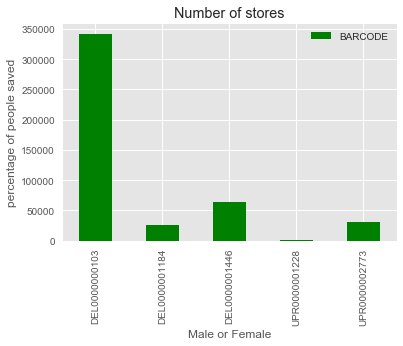

In [65]:
%pylab inline

ax = x.plot(kind='bar',
            title='Number of stores',
            grid=True,
            legend=True,
            color="green")
ax.set(xlabel="Male or Female", ylabel="percentage of people saved")

In [80]:
y = store.groupby(['MACID'])['BARCODE'].count()
y

MACID
23372129         1
23942158         1
24749329         1
24920107         1
24971184         1
25107385         1
25146601         1
COUNTER8      3544
Counter1     49129
Counter2      7449
Counter3       674
Counter4        87
Counter5      3020
counter1    398236
counter2       235
Name: BARCODE, dtype: int64

In [90]:
z = y[y >= y.median()]
z = z[z < z.max()]    # Removing outlier
z

MACID
COUNTER8     3544
Counter1    49129
Counter2     7449
Counter3      674
Counter4       87
Counter5     3020
counter2      235
Name: BARCODE, dtype: int64

[<matplotlib.text.Text at 0x91d31080>, <matplotlib.text.Text at 0x917d49b0>]

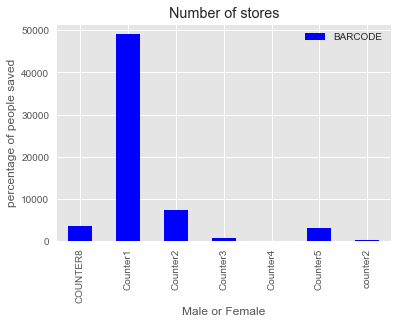

In [99]:
ax = z.plot(kind='bar',
            title='Number of stores',
            grid=True,
            legend=True,
            color="blue")
ax.set(xlabel="Male or Female", ylabel="percentage of people saved")

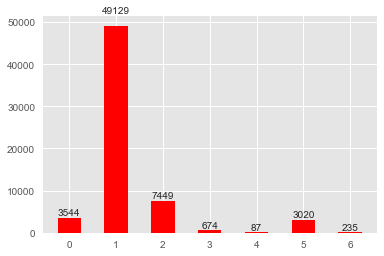

In [124]:
fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(z.count()), z, 0.5, color='r')

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
        

autolabel(rects1)
plt.show()

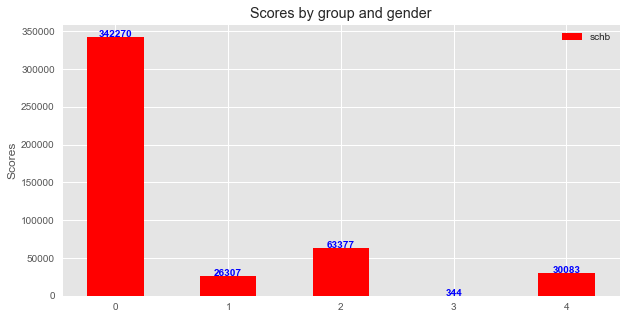

In [157]:
fig, ax1 = plt.subplots(figsize=(10,5))
rects1 = ax1.bar(np.arange(x.count()), x, 0.5, color='r',label='schb')
ax1.set_ylabel('Scores')
ax1.set_title('Scores by group and gender')
ax1.legend(loc='upper right')
for i in range(0,len(x)):
    ax1.text(i, x.iloc[i], x.iloc[i], color='blue', fontweight='bold',ha='center')

plt.show()
